# EDA and Data Visualization of GHG Emissions in the Philippines

In [51]:
library(tidyverse)
library(lubridate)
library(ggplot2)
library(DT)
library(skimr)
library(janitor)
library(reshape2)

In [52]:
options(repr.plot.width = 15, repr.plot.height = 9, repr.plot.res=140, repr.plot.pointsize=12)

In [53]:
# Replace with your actual file path if local
ghg_data <- read_csv("phil_synthetic_ghg_emissions_2010_2050.csv", show_col_types = FALSE)

head(ghg_data)

Year,Sector,CO2,CH4,N2O,HFCs
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
2010,Biological Treatment of Solid Waste,NA,35.0000,32.0000,NA
2015,Biological Treatment of Solid Waste,NA,70.9360,40.2820,NA
2020,Biological Treatment of Solid Waste,NA,391.6640,222.3350,NA
2021,Biological Treatment of Solid Waste,NA,379.8651,212.4067,NA
2022,Biological Treatment of Solid Waste,NA,415.5315,231.4402,NA
2023,Biological Treatment of Solid Waste,NA,451.1979,250.4737,NA


In [54]:
# Basic stat summary
summary(ghg_data)

      Year         Sector               CO2                 CH4          
 Min.   :2010   Length:1086        Min.   :-132994.6   Min.   : -216.99  
 1st Qu.:2026   Class :character   1st Qu.:    173.9   1st Qu.:    0.41  
 Median :2034   Mode  :character   Median :    803.5   Median :   26.05  
 Mean   :2034                      Mean   :  10897.2   Mean   : 4699.63  
 3rd Qu.:2042                      3rd Qu.:  18192.7   3rd Qu.: 2792.00  
 Max.   :2050                      Max.   : 197631.6   Max.   :41404.45  
                                   NA's   :398         NA's   :399       
      N2O                 HFCs      
 Min.   :  -33.305   Min.   :  771  
 1st Qu.:    5.858   1st Qu.: 4566  
 Median :  222.392   Median : 6412  
 Mean   : 1523.090   Mean   : 6328  
 3rd Qu.: 1380.540   3rd Qu.: 8257  
 Max.   :14938.243   Max.   :10103  
 NA's   :466         NA's   :1053   

In [55]:
# Check for missing values
colSums(is.na(ghg_data))

Year Sector    CO2    CH4    N2O   HFCs 
     0      0    398    399    466   1053

In [56]:
# Unique sectors
unique_sectors <- unique(ghg_data$Sector)
length(unique_sectors)  # Number of sectors
unique_sectors

[1] 33

[1] "Biological Treatment of Solid Waste"                       
 [2] "Biomass Burning - Forests"                                 
 [3] "Biomass Burning in Croplands and Grasslands"               
 [4] "Biomass Carbon Stock"                                      
 [5] "Biomass Carbon Stock Agroforestry/Perennial Crop"          
 [6] "Biomass Carbon Stock Deforestation"                        
 [7] "Biomass Carbon Stock Silvopasture"                         
 [8] "Chemical Industry"                                         
 [9] "Direct N2O Emissions from Managed Soils"                   
[10] "Direct N2O Emissions from Manure Management"               
[11] "Domestic Aviation"                                         
[12] "Energy Industries"                                         
[13] "Enteric Fermentation"                                      
[14] "Fugitive Emissions - Oil and Natural Gas"                  
[15] "Fugitive Emissions - Solid Fuels"                          
[16] "Incineration and Open Burning of Waste"                    
[17] "Indirect N2O Emissions from Managed Soils"                 
[18] "Liming"                                                    
[19] "Manufacturing Industries and Construction"                 
[20] "Manure Management"                                         
[21] "Metal Industry"                                            
[22] "Mineral Industry"                                          
[23] "Non-Energy Products from Fuels and Solvent Use"            
[24] "Other Sectors"                                             
[25] "Other Transportation"                                      
[26] "Product Uses as Substitutes for Ozone-Depleting Substances"
[27] "Railways"                                                  
[28] "Rice Cultivation"                                          
[29] "Road Transport"                                            
[30] "Solid Waste Disposal"                                      
[31] "Urea Application"                                          
[32] "Wastewater Treatment and Discharge"                        
[33] "Water-borne Navigation"

In [57]:
# tail(ghg_data, 100)

## **Descriptive Statistics by Gas and Sector**

### Summary Statistics for Each Gas (CO₂, CH₄, N₂O, HFCs)**

The table presents descriptive statistics for each greenhouse gas (CH₄, CO₂, HFCs, and N₂O) in the Philippines from 2010 to 2050 based on your synthetic dataset. The summary shows major differences in scale, central tendency, and spread between gases.

In [58]:
# Gather the gas columns into long format
ghg_long <- ghg_data %>%
  tidyr::pivot_longer(cols = c(CO2, CH4, N2O, HFCs), names_to = "Gas", values_to = "Emissions")

# Remove rows with NA emissions
ghg_long <- ghg_long %>% filter(!is.na(Emissions))

# Summary statistics by Gas
summary_stats_gas <- ghg_long %>%
  group_by(Gas) %>%
  summarise(
    count = n(),
    mean = mean(Emissions, na.rm=TRUE),
    median = median(Emissions, na.rm=TRUE),
    sd = sd(Emissions, na.rm=TRUE),
    min = min(Emissions, na.rm=TRUE),
    max = max(Emissions, na.rm=TRUE),
    sum = sum(Emissions, na.rm=TRUE)
  )
print(summary_stats_gas)

# A tibble: 4 × 8
  Gas   count   mean median     sd       min     max      sum
  <chr> <int>  <dbl>  <dbl>  <dbl>     <dbl>   <dbl>    <dbl>
1 CH4     687  4700.   26.0  9862.    -217.   41404. 3228648.
2 CO2     688 10897.  803.  40729. -132995.  197632. 7497281.
3 HFCs     33  6328. 6412.   2394.     771    10103.  208811.
4 N2O     620  1523.  222.   2906.     -33.3  14938.  944316.


### Visualizing the Distribution of Emissions by Gas

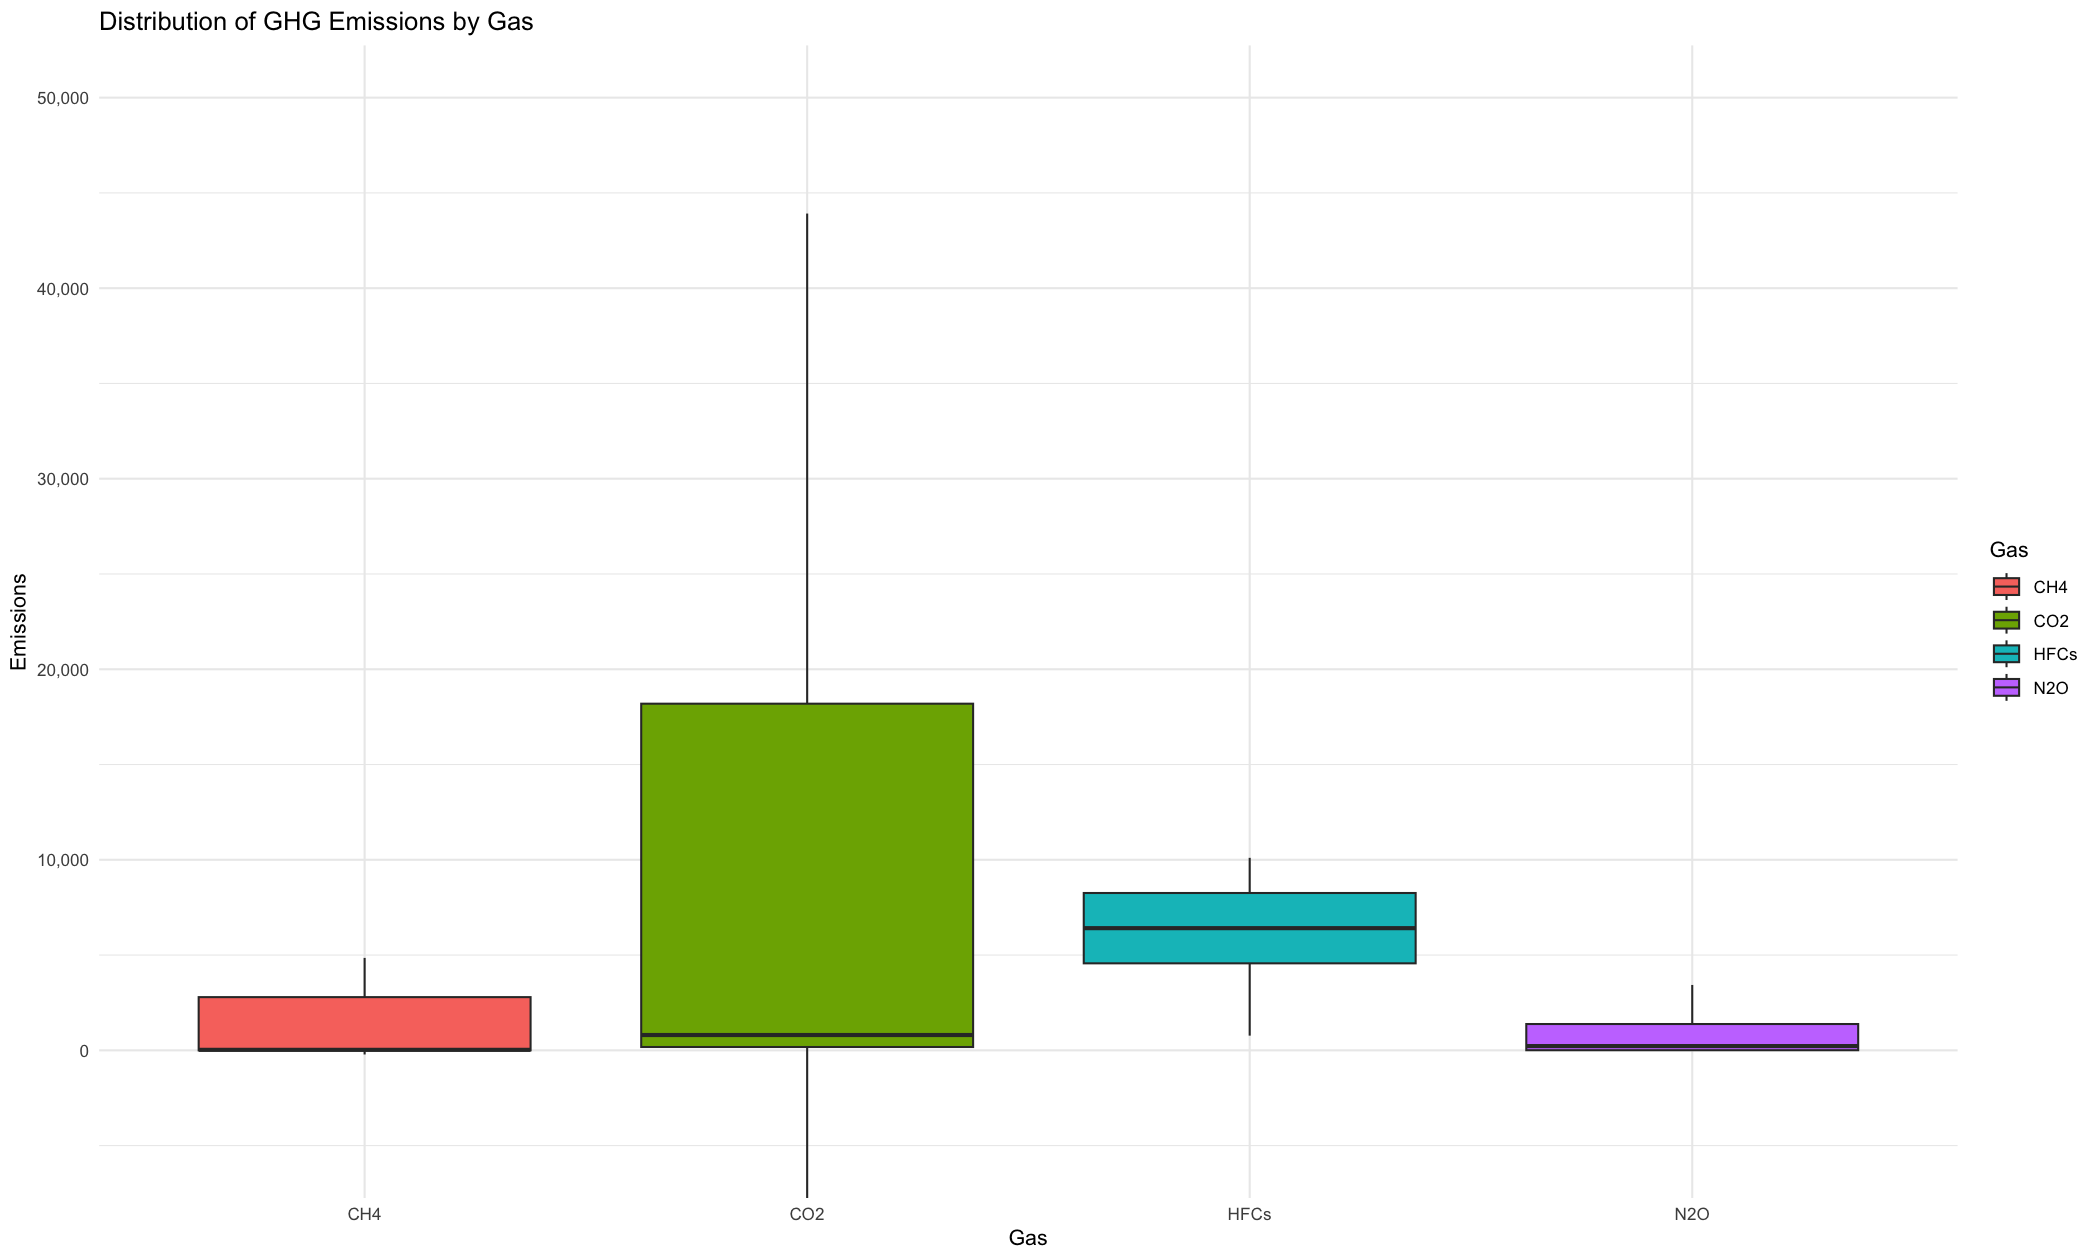

In [59]:
ggplot(ghg_long, aes(x = Gas, y = Emissions, fill = Gas)) +
  geom_boxplot(outlier.shape = NA) + # avoid extreme outlier distortion
  coord_cartesian(ylim = c(-5000, 50000)) +
  scale_y_continuous(labels = scales::comma) +
  labs(title = "Distribution of GHG Emissions by Gas",
       y = "Emissions", x = "Gas") +
  theme_minimal()

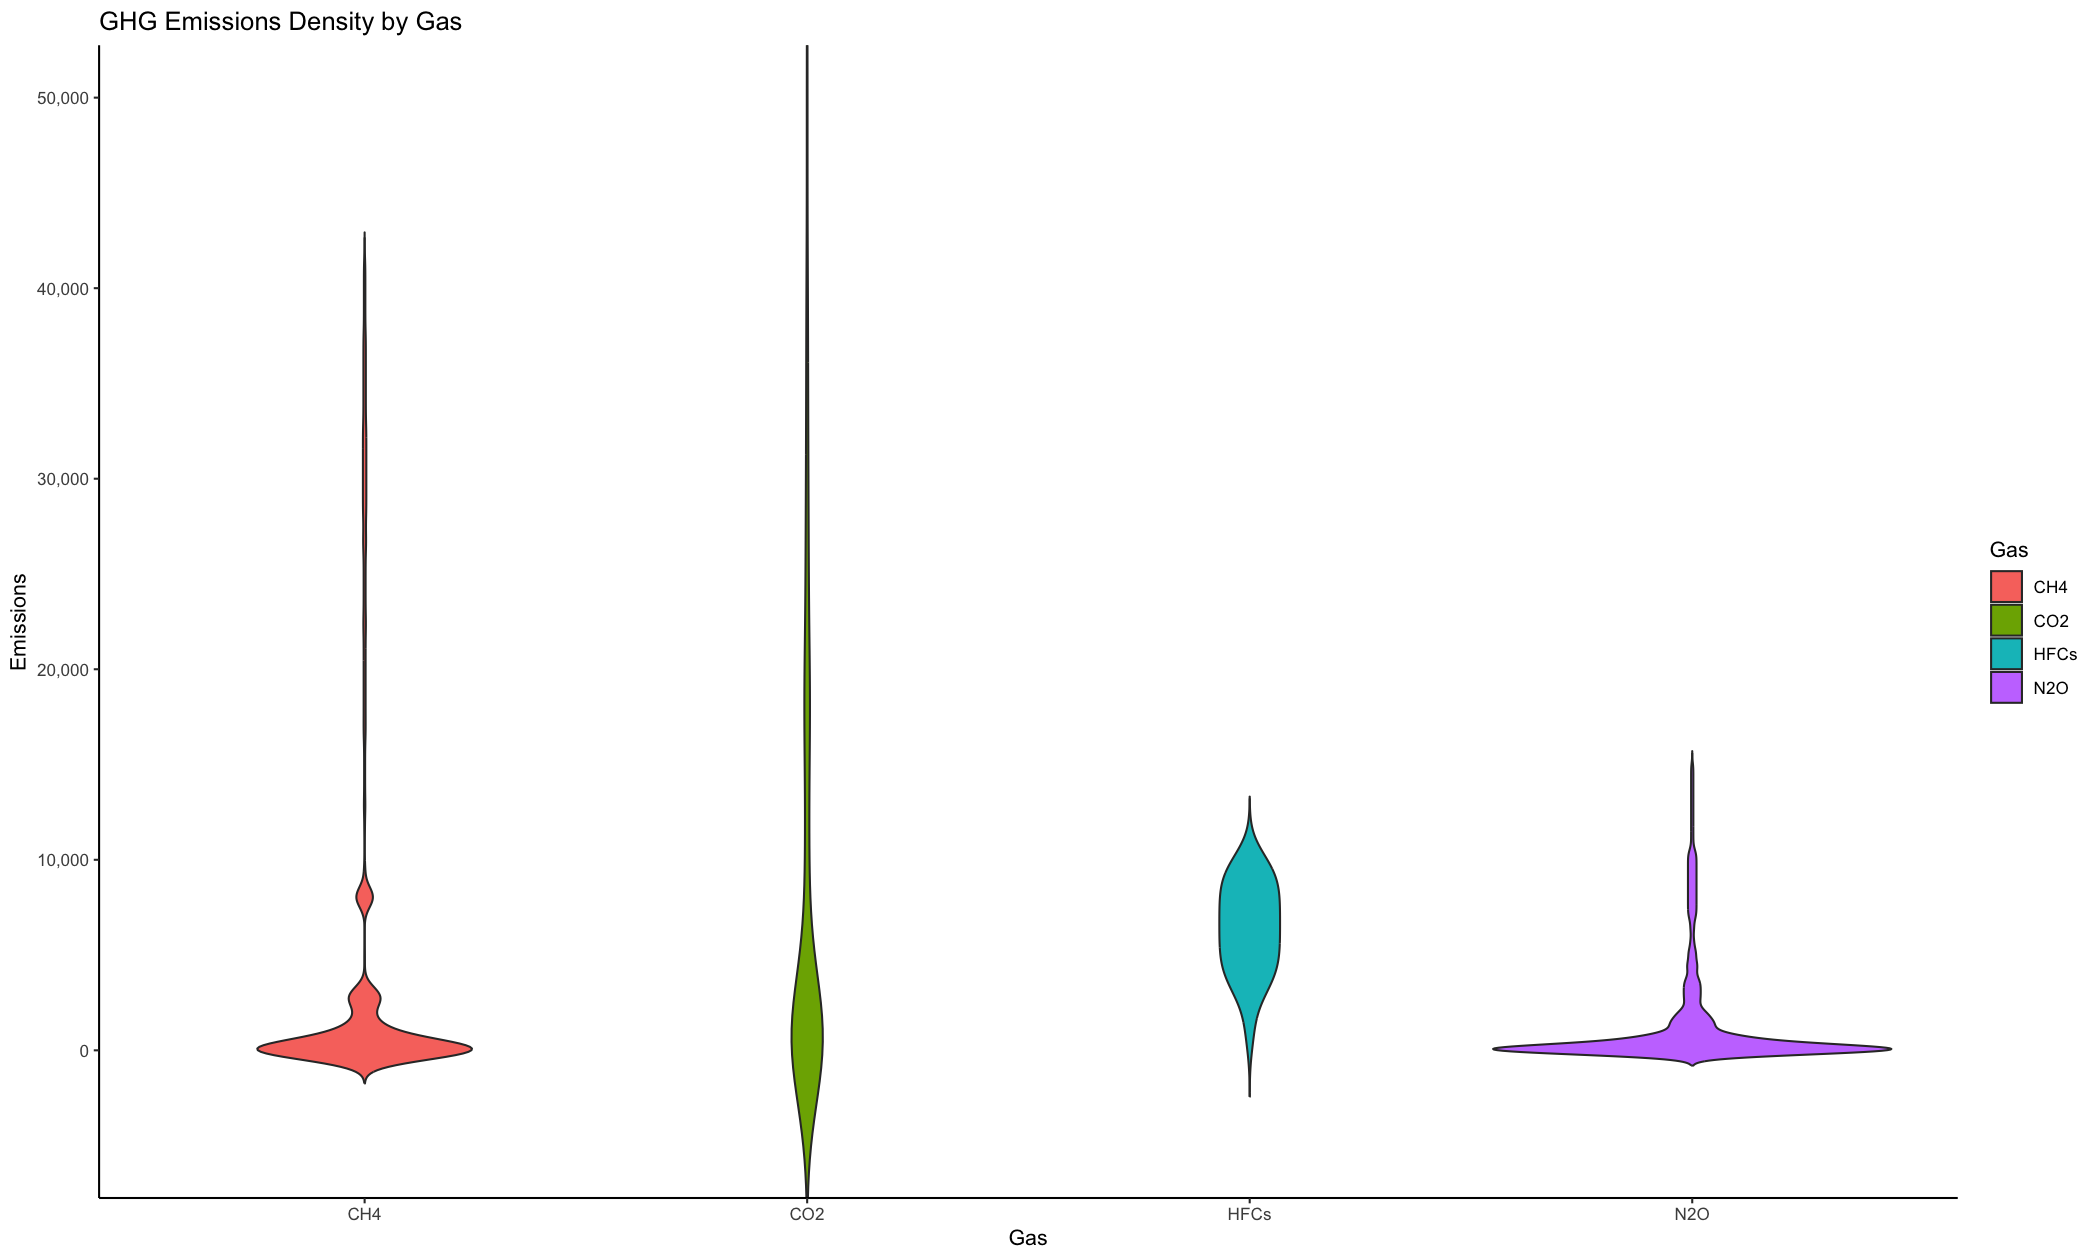

In [60]:
ggplot(ghg_long, aes(x = Gas, y = Emissions, fill = Gas)) +
  geom_violin(trim = FALSE) +
  coord_cartesian(ylim = c(-5000, 50000)) +
  scale_y_continuous(labels = scales::comma) +
  labs(title = "GHG Emissions Density by Gas",
       y = "Emissions", x = "Gas") +
  theme_classic()

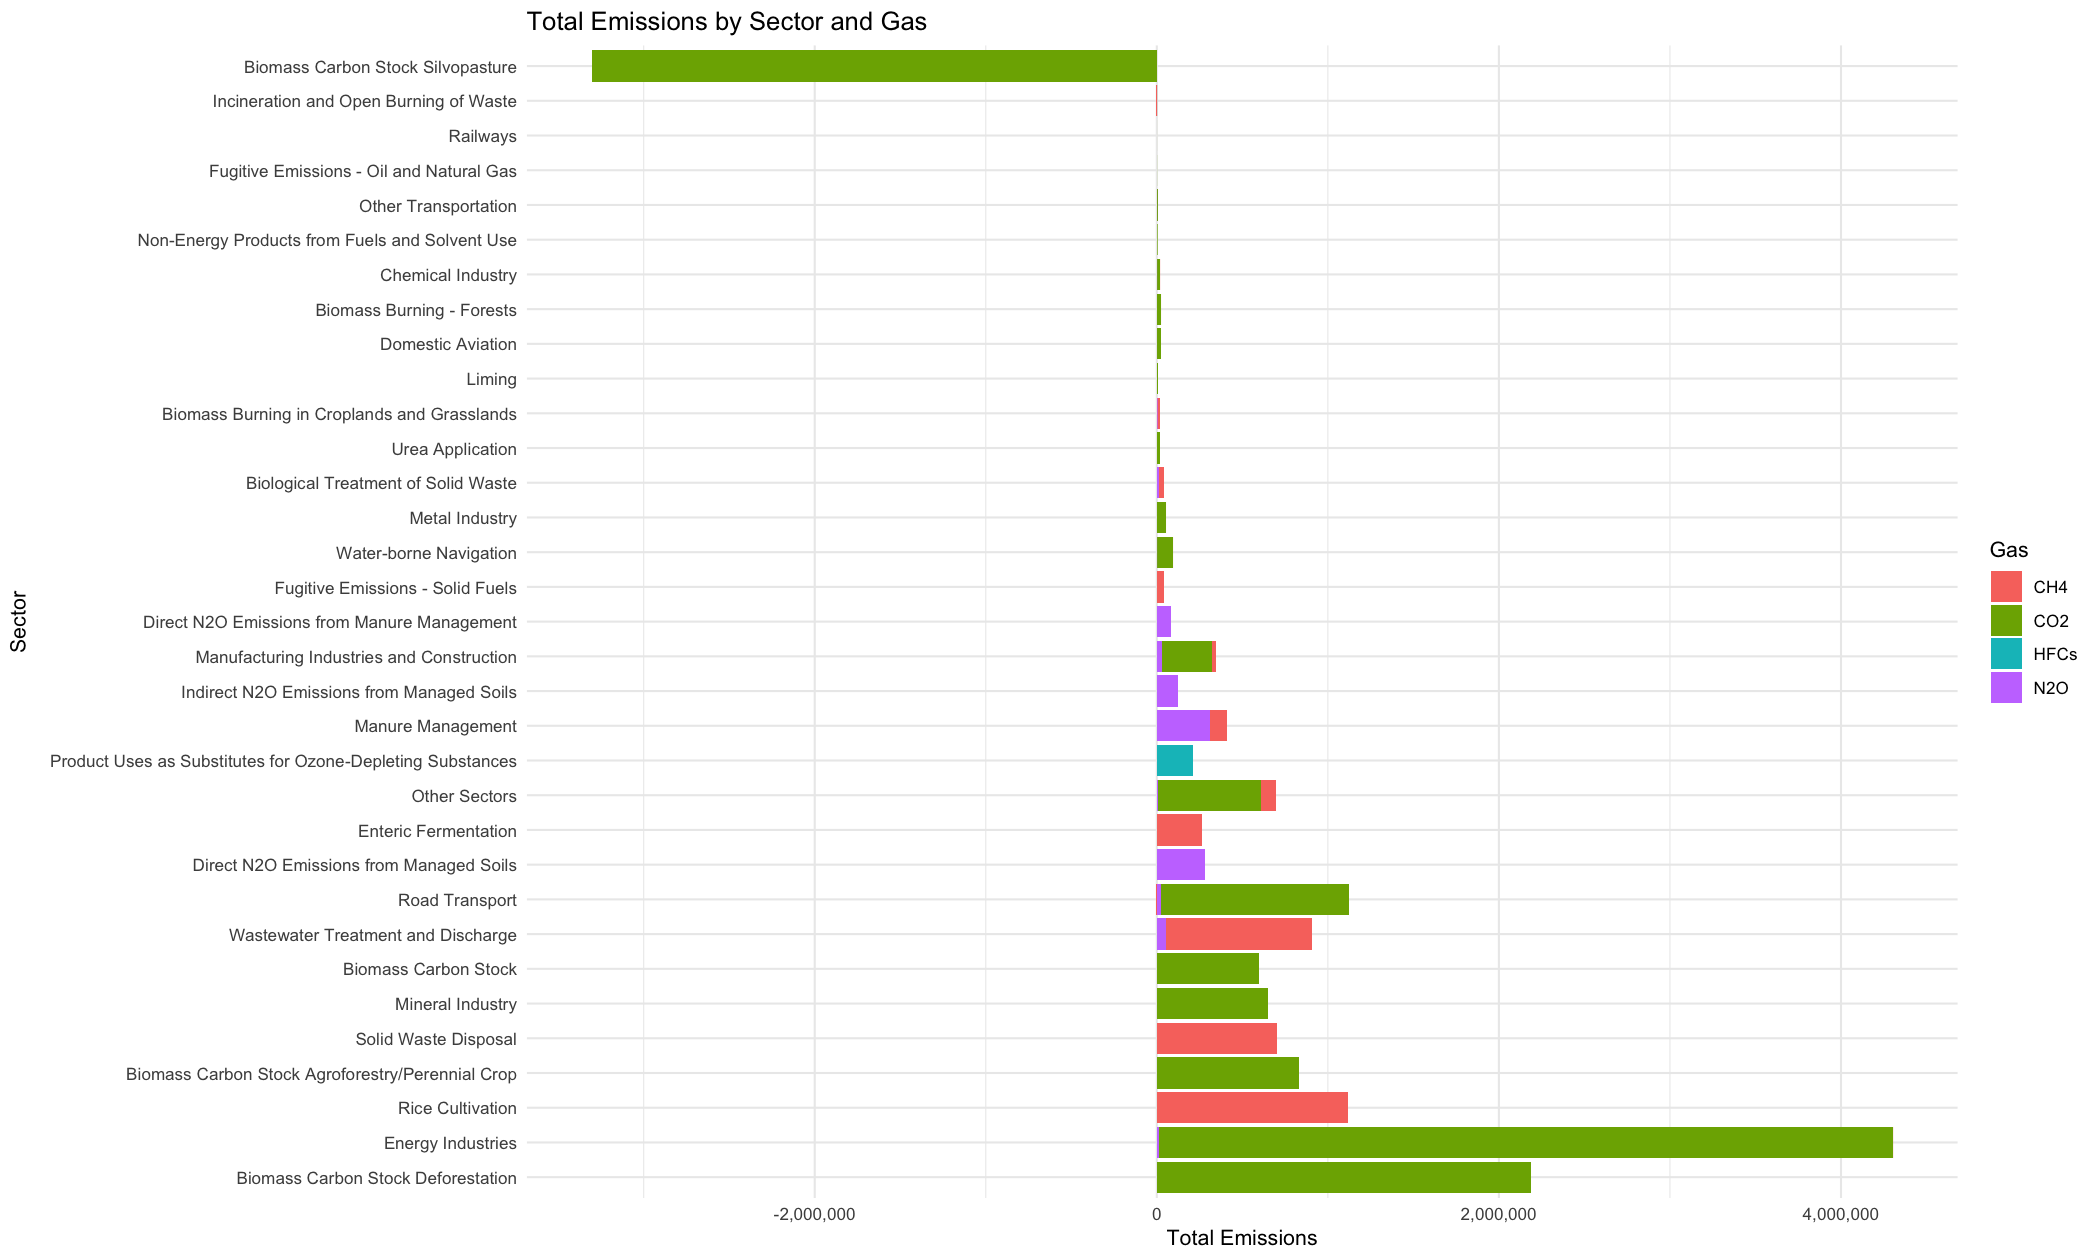

In [61]:
ggplot(summary_stats_sector, aes(x = reorder(Sector, -sum), y = sum, fill = Gas)) +
  geom_bar(stat = "identity", position = "stack") +
  coord_flip() +
  scale_y_continuous(labels = scales::comma) +
  labs(title = "Total Emissions by Sector and Gas",
       x = "Sector", y = "Total Emissions") +
  theme_minimal()


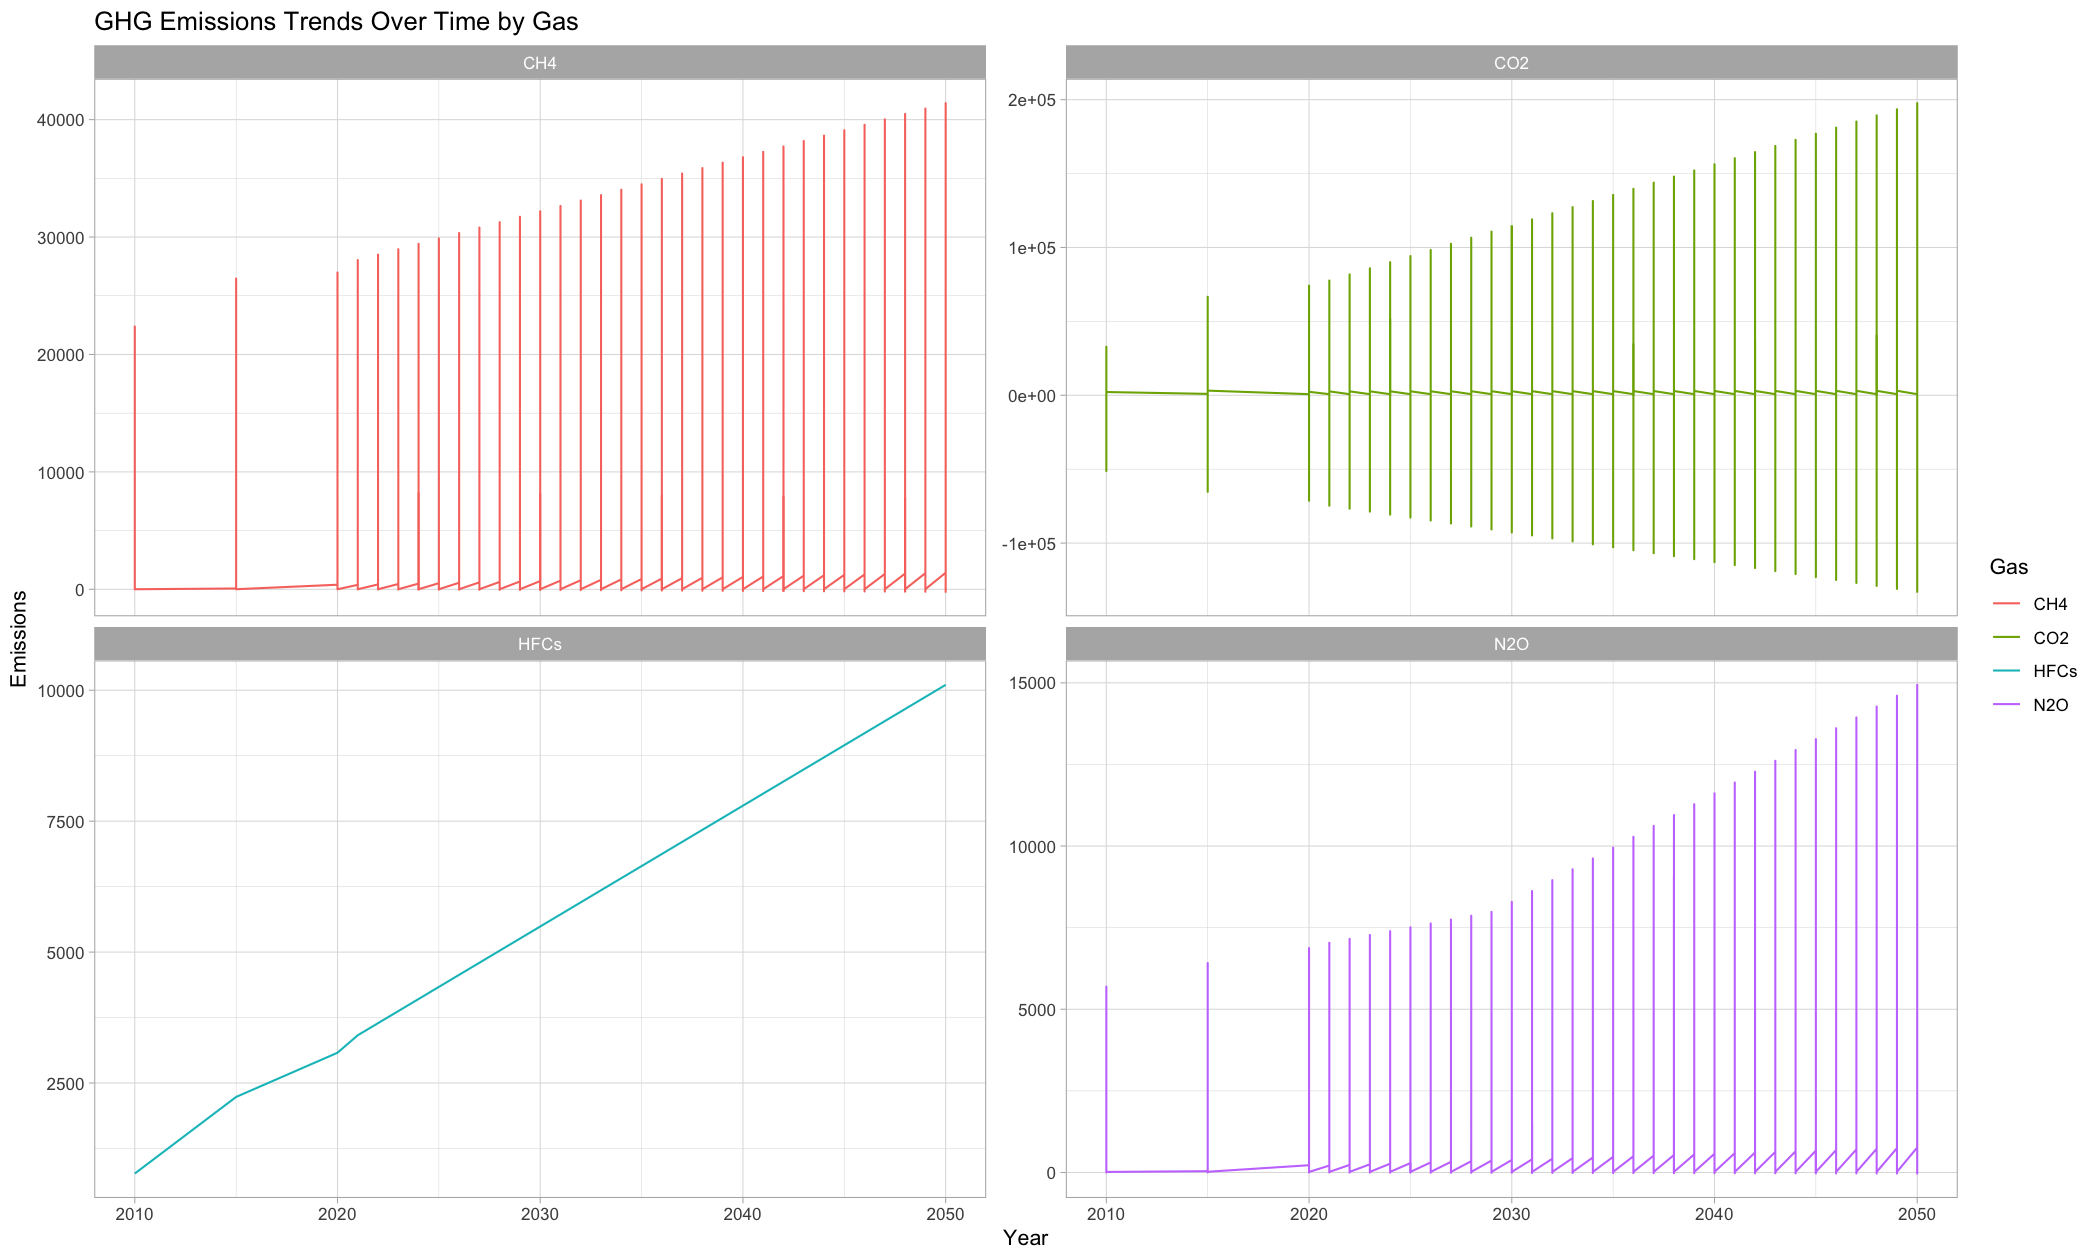

In [62]:
ggplot(ghg_long, aes(x = Year, y = Emissions, color = Gas)) +
  geom_line() +
  facet_wrap(~Gas, scales = "free_y") +
  labs(title = "GHG Emissions Trends Over Time by Gas",
       y = "Emissions", x = "Year") +
  theme_light()


### Summary Statistics by Sector

In [63]:
summary_stats_sector <- ghg_long %>%
  group_by(Sector, Gas) %>%
  summarise(
    mean = mean(Emissions, na.rm=TRUE),
    sum = sum(Emissions, na.rm=TRUE),
    min = min(Emissions, na.rm=TRUE),
    max = max(Emissions, na.rm=TRUE),
    .groups = 'drop'
  )
# print(head(summary_stats_sector, 20)) # Show first 20 rows

summary_stats_sector

Sector,Gas,mean,sum,min,max
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
Biological Treatment of Solid Waste,CH4,8.305587e+02,27408.4360,3.500000e+01,1.414191e+03
Biological Treatment of Solid Waste,N2O,4.529209e+02,14946.3895,3.200000e+01,7.643782e+02
Biomass Burning - Forests,CH4,7.000000e+00,217.0000,7.000000e+00,7.000000e+00
Biomass Burning - Forests,CO2,7.506154e+02,24019.6920,7.445940e+02,9.372780e+02
Biomass Burning - Forests,N2O,2.000000e+00,62.0000,2.000000e+00,2.000000e+00
Biomass Burning in Croplands and Grasslands,CH4,4.942794e+02,16311.2205,2.860000e+02,6.323345e+02
Biomass Burning in Croplands and Grasslands,N2O,1.088446e+02,3591.8710,9.600000e+01,1.181097e+02
Biomass Carbon Stock,CO2,1.815012e+04,598953.9460,1.108400e+04,3.120800e+04
Biomass Carbon Stock Agroforestry/Perennial Crop,CO2,2.524877e+04,833209.3975,-1.297300e+04,4.995585e+04


### Heatmap of Mean Emissions by Sector and Gas

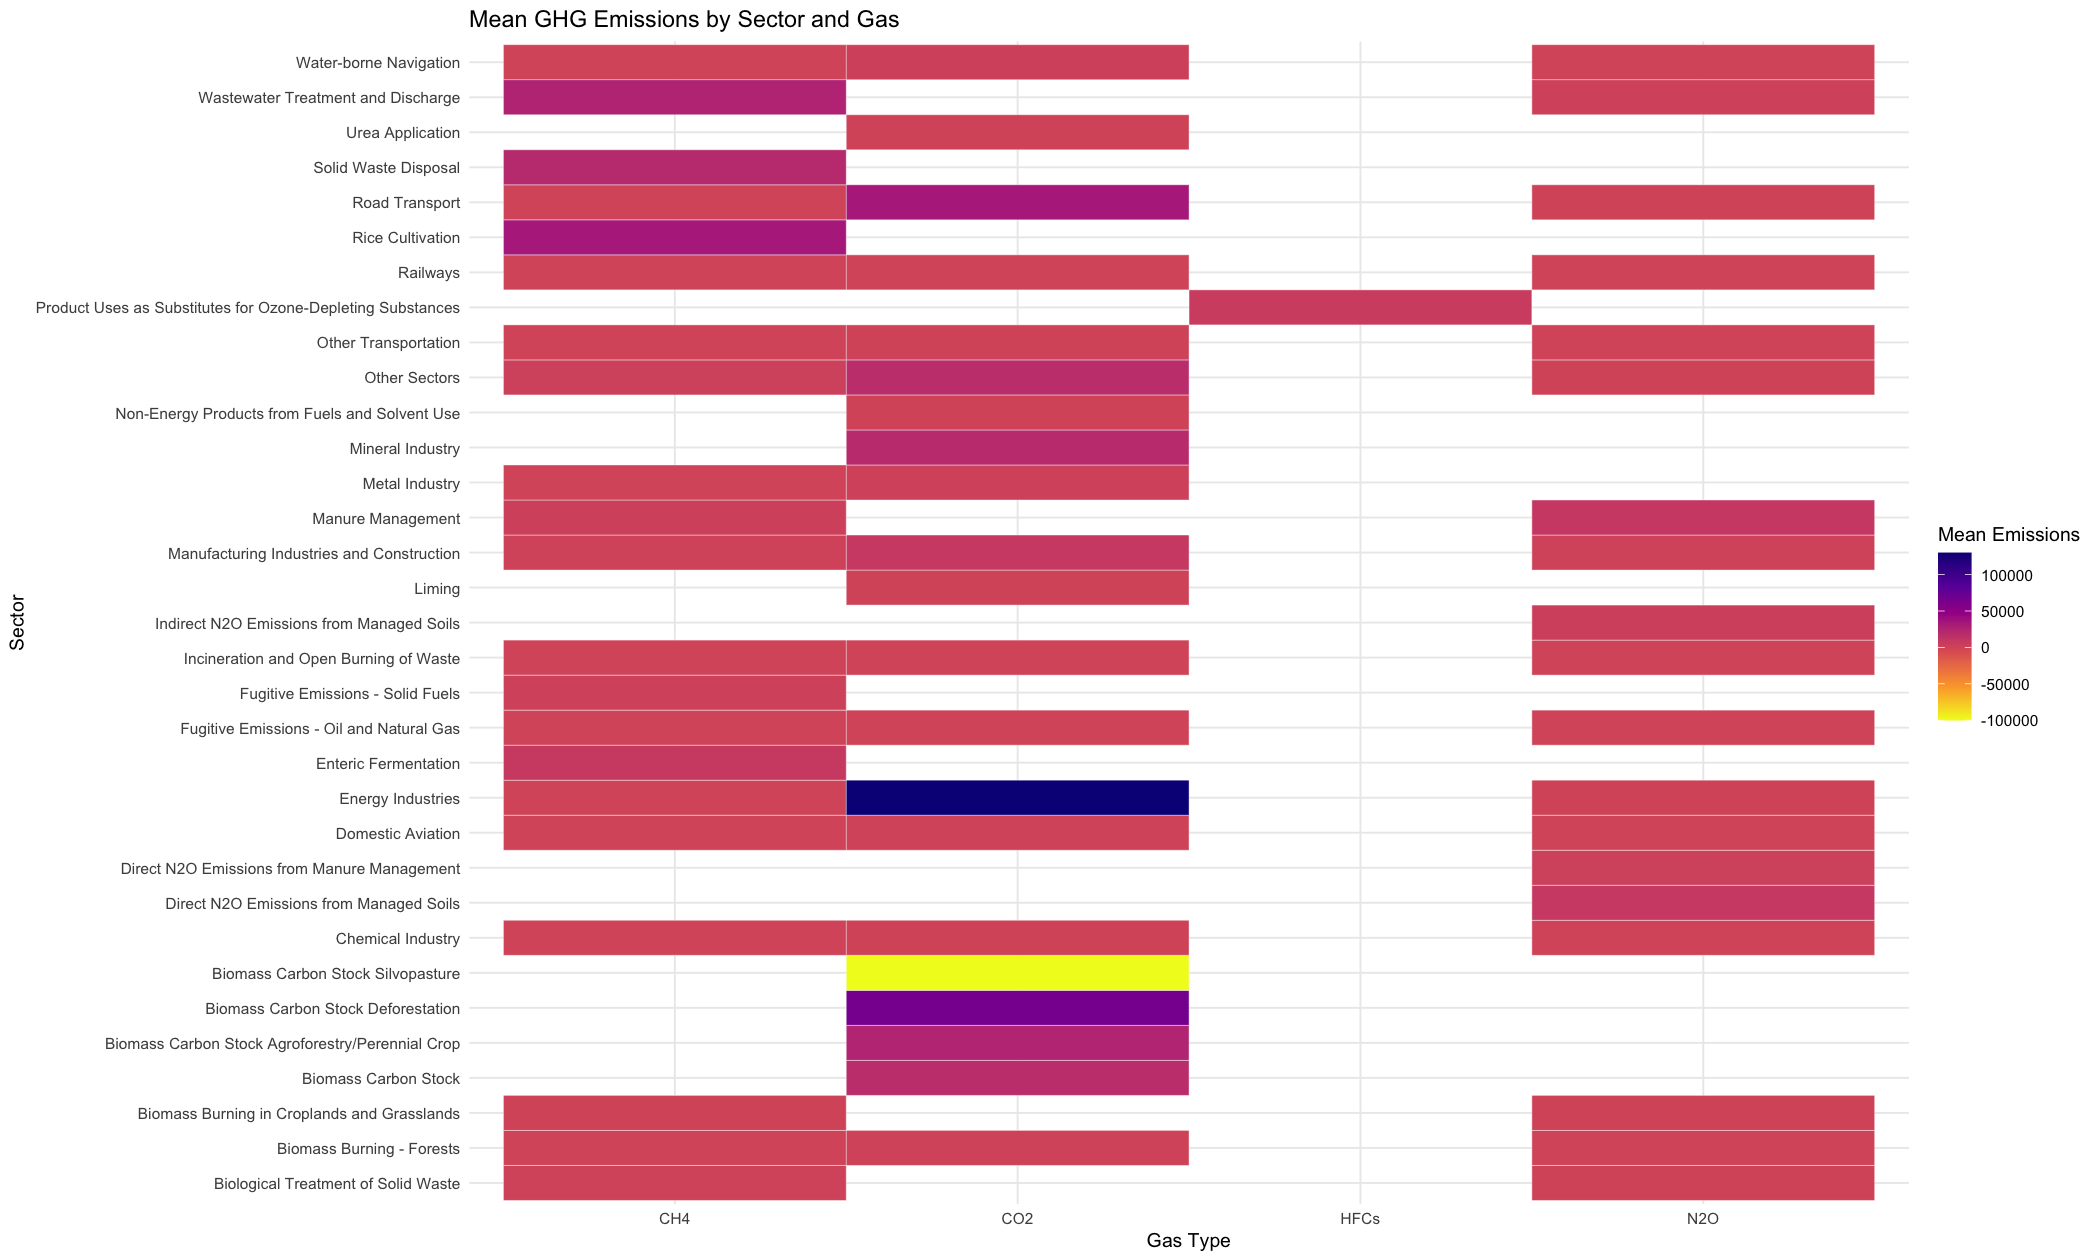

In [64]:
summary_stats_sector_clean <- summary_stats_sector %>%
  mutate(Sector = stringr::str_wrap(Sector, width = 100))

ggplot(summary_stats_sector_clean, aes(x = Gas, y = Sector, fill = mean)) +
  geom_tile(color = "white") +
  scale_fill_viridis_c(option = "C", direction = -1) +
  labs(title = "Mean GHG Emissions by Sector and Gas",
       x = "Gas Type", y = "Sector", fill = "Mean Emissions") +
  theme_minimal(base_size = 10)

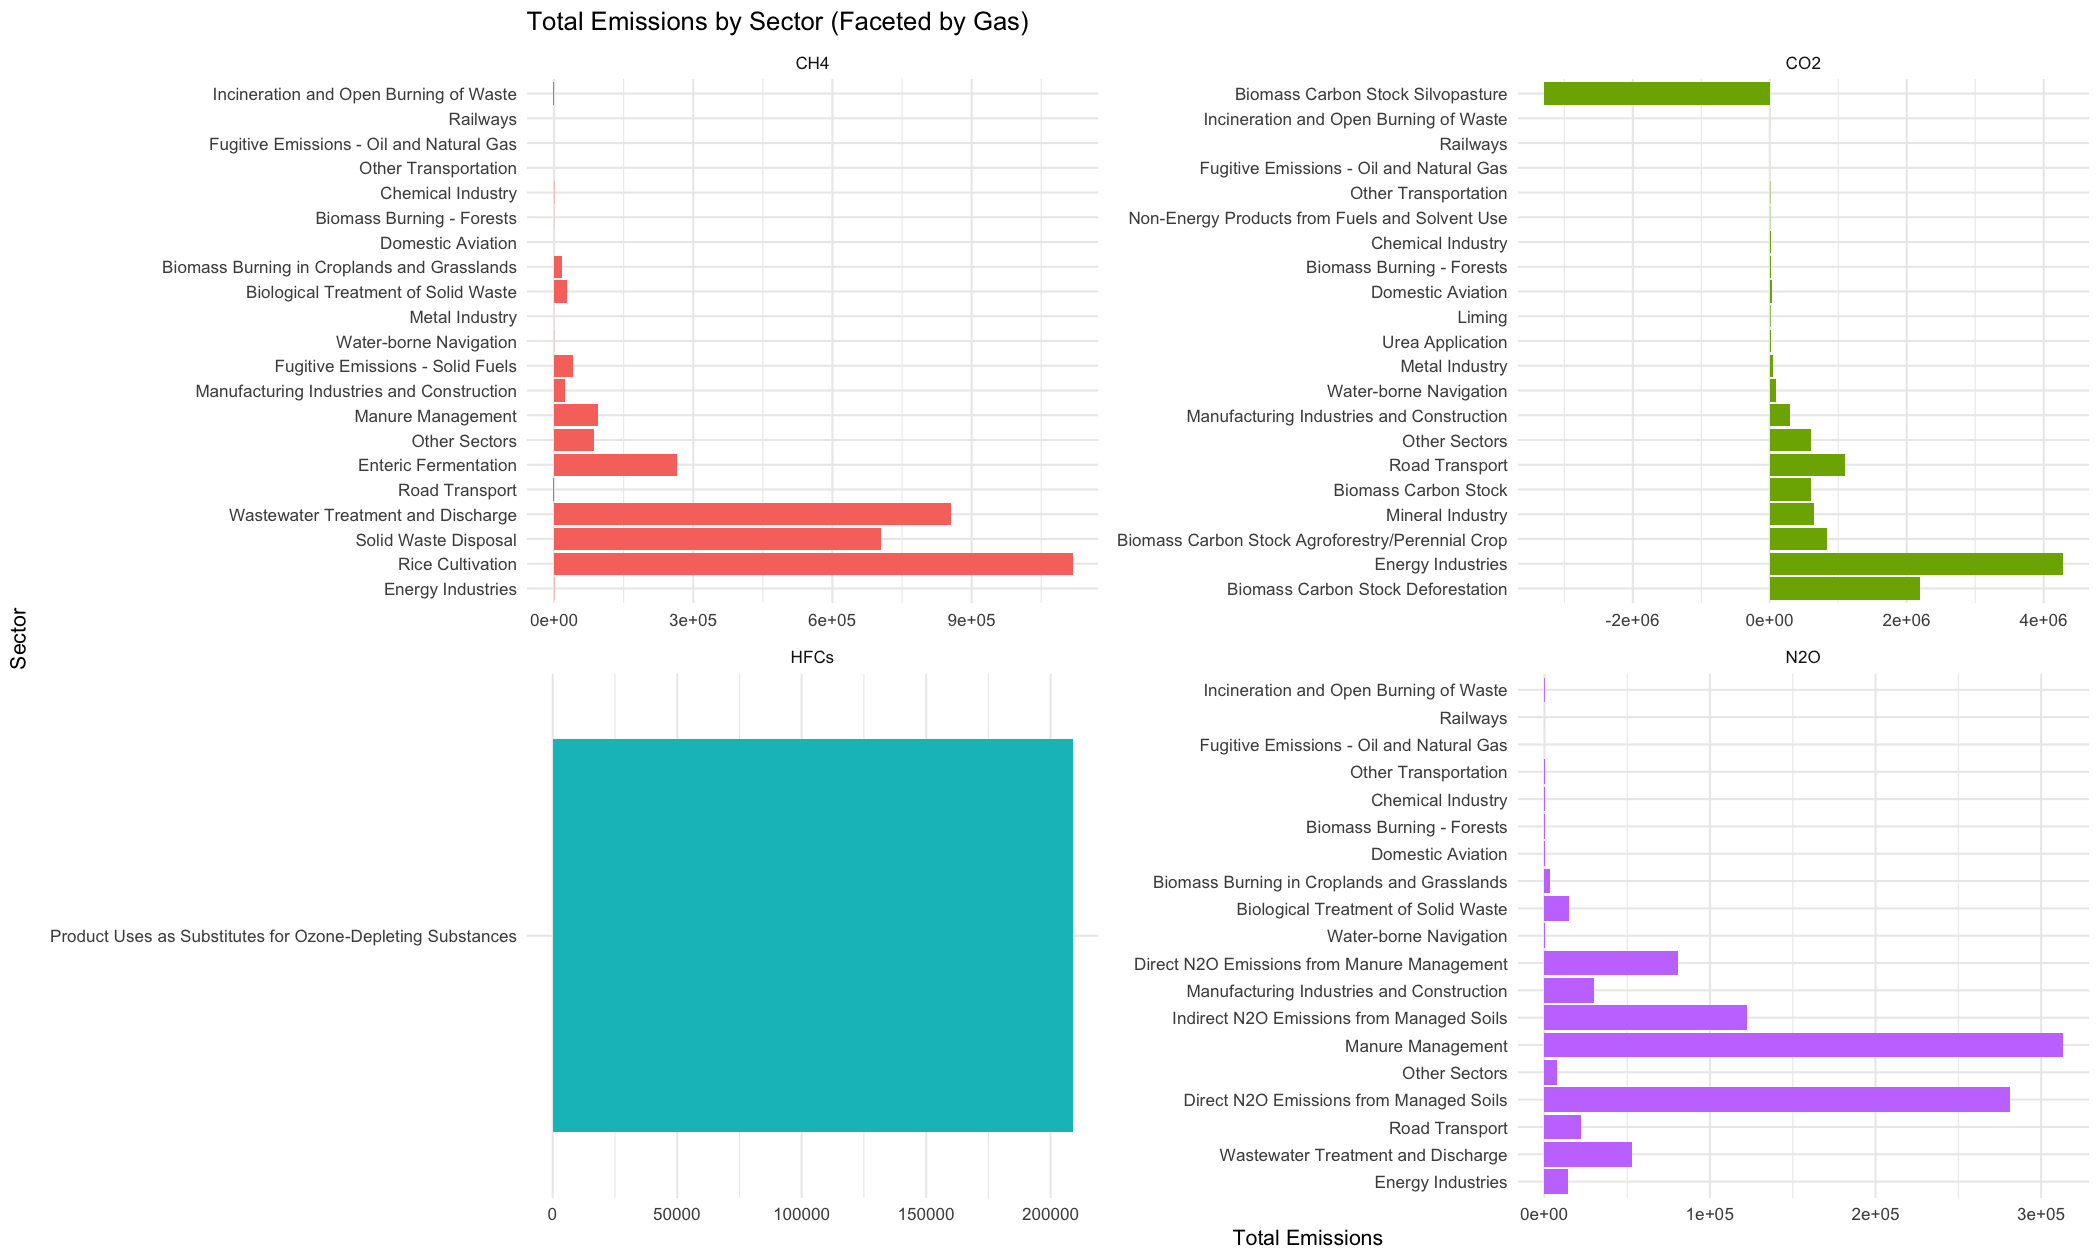

In [65]:
ggplot(summary_stats_sector_clean, aes(x = reorder(Sector, -sum), y = sum, fill = Gas)) +
  geom_col() +
  facet_wrap(~Gas, scales = "free") +
  coord_flip() +
  labs(title = "Total Emissions by Sector (Faceted by Gas)",
       x = "Sector", y = "Total Emissions") +
  theme_minimal() +
  theme(legend.position = "none")


**Insights**:

* The **mean >> median** in CO₂ and CH₄ indicates **positive skew** — few very high values are inflating the mean.
* The **high standard deviation** for CO₂ and CH₄ suggests **wide variability** across sectors and years.
* **Negative values** in some gases (e.g., CO₂, CH₄, N₂O) indicate possible **removals/sequestration** or **data artifacts** (especially in land use).

**By Sector and Gas**

* **Energy Industries** and **Biomass Carbon Stock Deforestation** are the **highest CO₂ contributors**.
* **Enteric Fermentation** is the dominant source of **CH₄** emissions.
* **Direct N₂O Emissions from Managed Soils** dominate **N₂O** emissions — crucial for agriculture-focused mitigation.
* **Silvopasture** under **Biomass Carbon Stock** shows **large negative CO₂ values**, likely due to **carbon sequestration**.
* **Incineration and Open Burning of Waste** and **Fugitive Emissions** sometimes have **negative values** or **unexpected signs**, which may require **data validation** or represent **offsets**.

**Summary**
* **CO₂ dominates** in terms of magnitude and spread, largely driven by **energy and land use sectors**.
* **CH₄ from agriculture and waste** is a major concern with skewed distribution.
* **N₂O from soils and manure** highlights the need for **agricultural emission control**.
* Some **negative values** reflect potential **sequestration** or **offsets**, which are worth investigating further.
* **Visualization** aids in quickly identifying patterns, outliers, and skewness for better policy targeting.

In [50]:
# Total emissions by sector (sum all gases)
top_sectors <- ghg_long %>%
  group_by(Sector) %>%
  summarise(Total_Emissions = sum(Emissions, na.rm=TRUE)) %>%
  arrange(desc(Total_Emissions))

print(head(top_sectors, 10))

# A tibble: 10 × 2
   Sector                                           Total_Emissions
   <chr>                                                      <dbl>
 1 Energy Industries                                       4302341.
 2 Biomass Carbon Stock Deforestation                      2188190.
 3 Road Transport                                          1121690.
 4 Rice Cultivation                                        1117521.
 5 Wastewater Treatment and Discharge                       909572.
 6 Biomass Carbon Stock Agroforestry/Perennial Crop         833209.
 7 Solid Waste Disposal                                     704866.
 8 Other Sectors                                            694448.
 9 Mineral Industry                                         650053.
10 Biomass Carbon Stock                                     598954.
